# Exercícios

### Gerando algumas visualizações descritivas com matplotlib

Vamos utilizar um dataset [dos preços dos combustíveis no Brasil](https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil).

Reproduza as visualizações abaixo. Para cada uma, pense em pontos que você poderia modificar na visualização, pensando em aprimorá-la.

#### Preços médios do etanol e da gasolina, por região do Brasil

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv('2004-2021.tsv', sep='\t', header=0)
df.head(3)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098


In [145]:
df_etanol_media = df.loc[df['PRODUTO']=='ETANOL HIDRATADO',['DATA INICIAL','REGIÃO','PREÇO MÉDIO REVENDA']]
df_gasolina_media = df.loc[df['PRODUTO']=='GASOLINA COMUM',['DATA INICIAL','REGIÃO','PREÇO MÉDIO REVENDA']]
df_etanol_media.head()

,DATA INICIAL,REGIÃO,PREÇO MÉDIO REVENDA
0,2004-05-09,CENTRO OESTE,1.288
1,2004-05-09,CENTRO OESTE,1.162
2,2004-05-09,CENTRO OESTE,1.389
3,2004-05-09,CENTRO OESTE,1.262
4,2004-05-09,NORDESTE,1.181


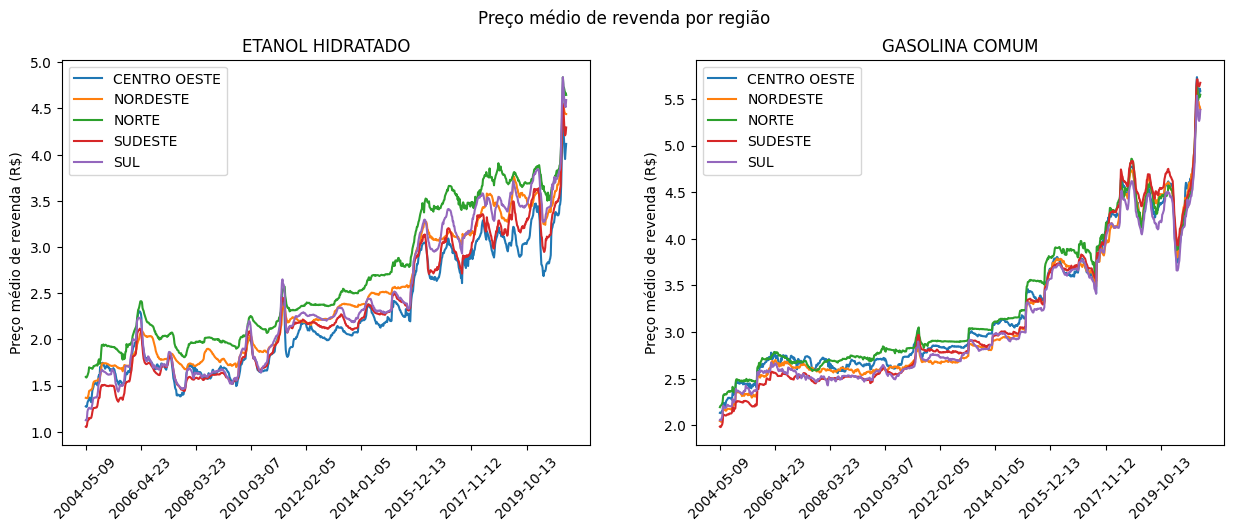

In [63]:
regioes = df_etanol_media['REGIÃO'].unique().tolist() # cria lista com todas regiões

x = df_etanol_media['DATA INICIAL'].unique().tolist() # eixo x com as datas

fig = plt.figure(figsize=(15,5)) # declara uma figura

# criando o primeiro gráfico
plt.subplot(1,2,1) 

for regiao in regioes: 
    y = df_etanol_media.loc[df_etanol_media['REGIÃO']==regiao,['DATA INICIAL','PREÇO MÉDIO REVENDA']].groupby('DATA INICIAL')['PREÇO MÉDIO REVENDA'].mean().tolist()
    plt.plot(x, y, label = regiao)  #plota o gráfico de cada região

plt.xticks(x[::100],rotation=45) # pega de 100 em 100 datas
plt.ylabel('Preço médio de revenda (R$)')
plt.title('ETANOL HIDRATADO')
plt.legend()

# criando o segundo gráfico
plt.subplot(1,2,2) 

for regiao in regioes: 
    y = df_gasolina_media.loc[df_gasolina_media['REGIÃO']==regiao,['DATA INICIAL','PREÇO MÉDIO REVENDA']].groupby('DATA INICIAL')['PREÇO MÉDIO REVENDA'].mean().tolist()
    plt.plot(x, y, label = regiao)  #plota o gráfico de cada região

plt.xticks(x[::100],rotation=45) 
plt.ylabel('Preço médio de revenda (R$)')
plt.title('GASOLINA COMUM')
plt.legend()

plt.suptitle('Preço médio de revenda por região')
plt.show()

#### Preço médio em 2020 dos preços do Etanol e da Gasolina por região

Output esperado
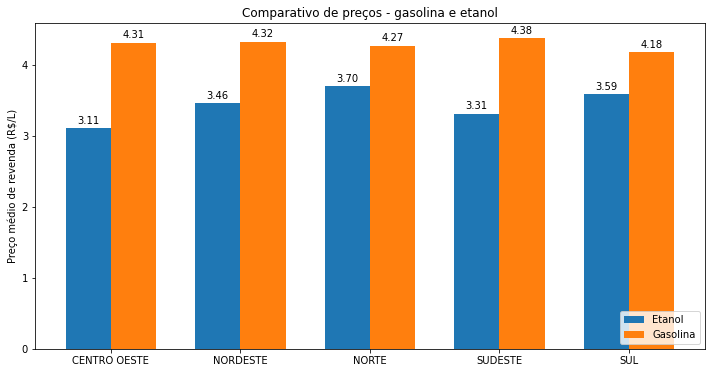

In [78]:
#cria coluna data e depois ano, para criar um novo df só com o ano de 2020
df['year'] = pd.to_datetime(df['DATA FINAL'])
df['year'] = pd.DatetimeIndex(df['date']).year
df2020 = df[df['year'] == 2020]
df2020.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,date,year
110731,2019-12-29,2020-01-04,NORTE,ACRE,ETANOL HIDRATADO,21,R$/l,3.979,0.165,3.740,4.390,0.516,0.041,3.463,0.072,3.3169,3.4962,0.021,2020-01-04,2020
110732,2019-12-29,2020-01-04,NORDESTE,ALAGOAS,ETANOL HIDRATADO,55,R$/l,3.356,0.325,2.995,4.400,0.415,0.097,2.941,0.123,2.75,3.1769,0.042,2020-01-04,2020
110733,2019-12-29,2020-01-04,NORTE,AMAPA,ETANOL HIDRATADO,3,R$/l,3.710,0.053,3.670,3.770,0.286,0.014,3.424,0.05,3.3891,3.4594,0.015,2020-01-04,2020
110734,2019-12-29,2020-01-04,NORTE,AMAZONAS,ETANOL HIDRATADO,39,R$/l,3.337,0.212,3.190,3.970,0.225,0.064,3.112,0.091,2.92,3.2499,0.029,2020-01-04,2020
110735,2019-12-29,2020-01-04,NORDESTE,BAHIA,ETANOL HIDRATADO,330,R$/l,3.611,0.163,3.190,4.299,0.634,0.045,2.977,0.135,2.4854,3.4635,0.045,2020-01-04,2020


In [96]:
x = df2020['REGIÃO'].unique().tolist()
media_etanol = list()
media_gasolina = list()

#pega o valor médio do etanol e gasolina em cada uma das regioes
for regiao in x:
    media_etanol.append(df2020.loc[(df2020['REGIÃO']==regiao) & (df2020['PRODUTO']=='ETANOL HIDRATADO')]['PREÇO MÉDIO REVENDA'].mean())
    media_gasolina.append(df2020.loc[(df2020['REGIÃO']==regiao) & (df2020['PRODUTO']=='GASOLINA COMUM')]['PREÇO MÉDIO REVENDA'].mean())

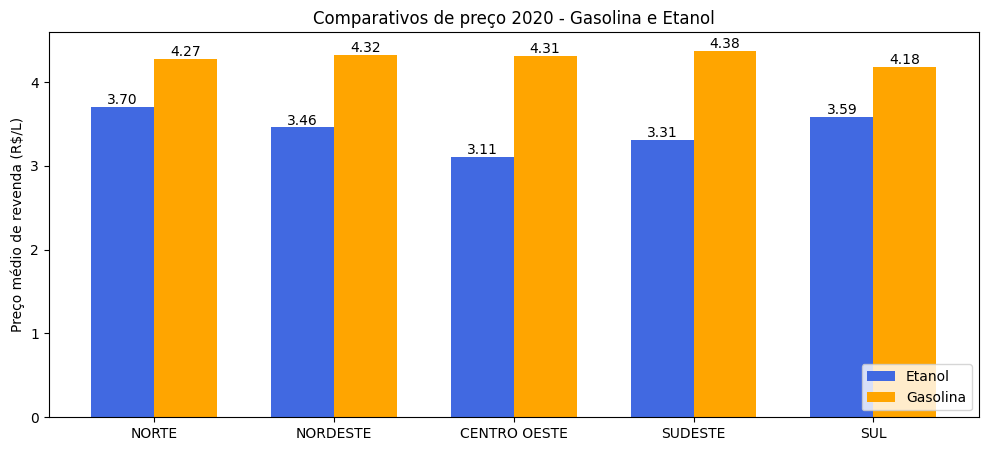

In [111]:
# usando ax de add_suplot

import numpy as np

N = 5 # number of columns
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
etanol = ax.bar(ind, media_etanol, width, color='royalblue')
gasolina = ax.bar(ind+width, media_gasolina, width, color='orange')

# add some
ax.set_ylabel('Preço médio de revenda (R$/L)')
ax.set_title('Comparativos de preço 2020 - Gasolina e Etanol')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( x )

ax.bar_label(etanol, fmt = '%.2f')
ax.bar_label(gasolina, fmt = '%.2f')

ax.legend(['Etanol','Gasolina'], loc='lower right')

plt.show()

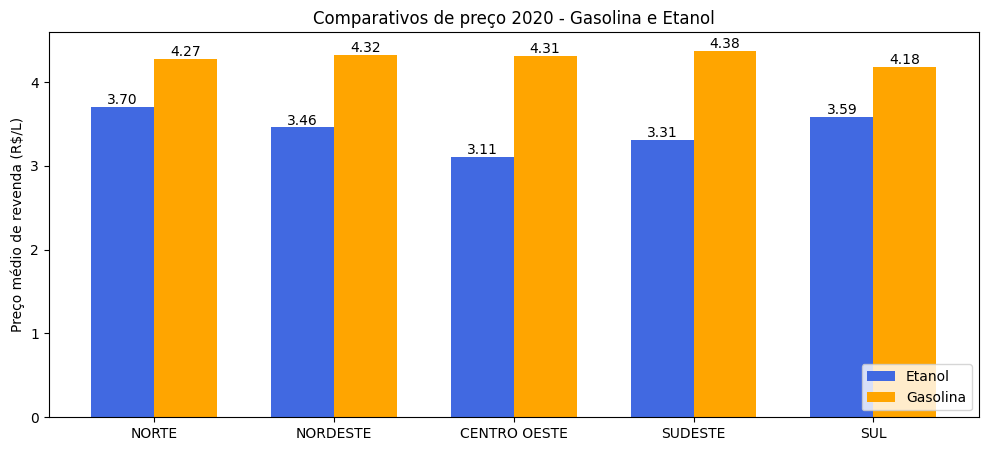

In [112]:
# usando ax de get_axes()

import numpy as np

N = 5 # number of groups
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(12,5))

etanol = plt.bar(ind, media_etanol, width, color='royalblue')
ax = fig.get_axes()
gasolina = plt.bar(ind+width, media_gasolina, width, color='orange')

# add some
ax[0].set_ylabel('Preço médio de revenda (R$/L)')
ax[0].set_title('Comparativos de preço 2020 - Gasolina e Etanol')
ax[0].set_xticks(ind + width / 2)
ax[0].set_xticklabels( x )

ax[0].bar_label(etanol, fmt = '%.2f')
ax[0].bar_label(gasolina, fmt = '%.2f')

ax[0].legend(['Etanol','Gasolina'], loc='lower right')

plt.show()

#### Total consolidado de postos para cada estado

Output esperado
\
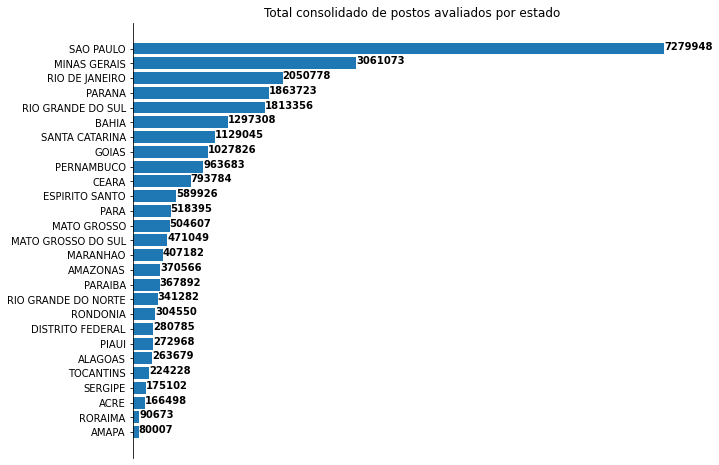 



In [114]:
df.head(1)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,date,year
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.35,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,2004-05-15,2004


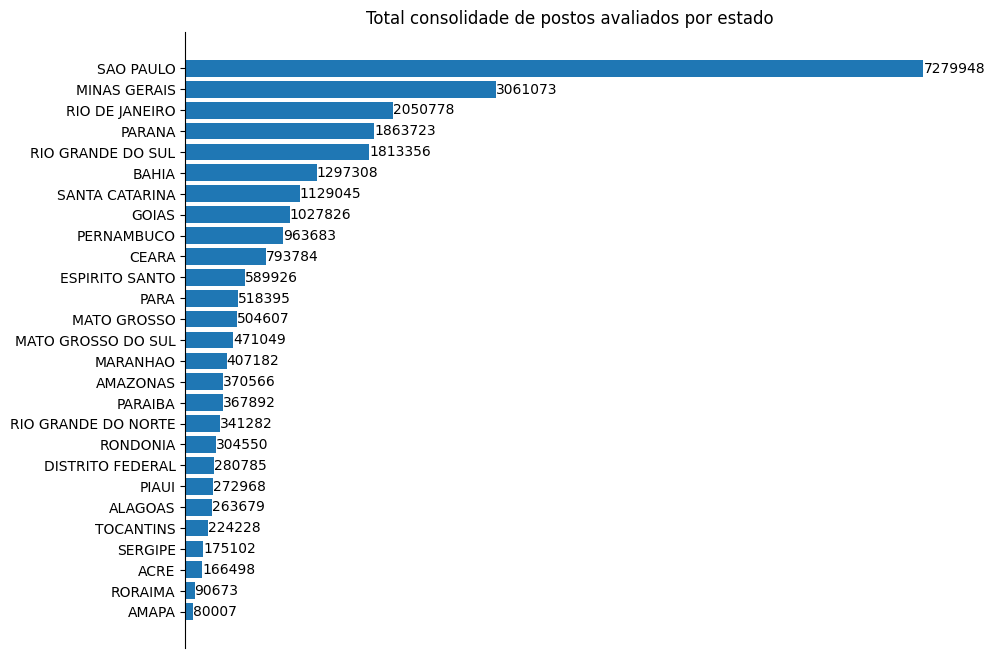

In [141]:
df_postos = df.groupby('ESTADO')['NÚMERO DE POSTOS PESQUISADOS'].sum().sort_values(ascending=True)
x = list(df_postos.index)
y = df_postos.values

fig = plt.figure(figsize=(10,8))

bars = plt.barh(x, y, align='center')
ax = fig.get_axes()

ax[0].set_title('Total consolidade de postos avaliados por estado ') # adiciona o titulo
ax[0].bar_label(bars, fmt = '%.0f') # adiciona legenda em cada barra

ax[0].spines[['right', 'top', 'bottom']].set_visible(False)  # remove as bordas
ax[0].get_xaxis().set_visible(False) # remove o eixo x da figura


plt.show()



#### Relação entre preço da gasolina e do etanol (nível Brasil)

Output esperado 

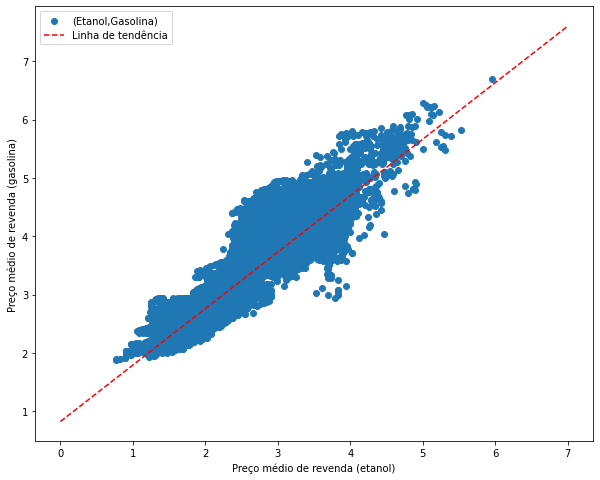